# HW2
### Dor & Guy


#### Theory Questions

**Q1:** To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.

**Q2:** T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

**Q3:** A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.

**Q4:** What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?


#### Answers:


**Q1:** In our model performance is more important to us. Accuracy represnts how much we are "correct".
        it's calculated by (TP+TN)/(TP+TN+FP+FN).
        But, some times if our data is imbalanced (almost every one is "sick") and our naive model says everyone is sick we will have high 
        accuracy. which means accuracy is not a good way to asses our model.
        therefore, we should use other methods to asses our model. 
        A good way to asses our model is using F1 which is:
        (2*percision*recall)/ (Percision+Sensitivity).
        Percision = TP/ (TP+FP) -> total predicted positive
        Sensitivity= TP/TP+FN -> Corecctly predicted positive.
        With F1 you can weight your model better, it has the highest score if FP and FN have simillar values.

**Q2:** The first model uses fewer features which means it can have higher correlation between the features and the labels. But! it may cause
        over-fitting because our dataset is now narrowed to only 2 features. That being said BP and BMI are a good features which can predict 
         heart attack quite well, too much data may cause under-fitting.
        The second mode. has much more features which might be good, but it can cause under-fitting our model will not "learn" cause we have
        confusing data which will make it unable to classify or worngly classfiying. In general more data/features is good and better and it
        can save us from being over-fitting and being more general in our learning.

**Q3:** The histologist should use non linear SVM. we know that the data he recieved in inseparable (for the human eye at least).
        Therefore, he can't use any linear method to sepreate the data using any linear line. this is way he should use a nonlinear SVM.

**Q4:** LR is a classifer that tries to get the maximum likelihood of label to occour. by doing so using probability we get a "smooth"
        likelihood of prediction to occour using statistical models. LR is influneced by its hyper-parameter (lambda) which is the weight for
        penalty for incorrect classifying. setting high value for lambda may cause over-fitting, setting a really low lambda value may cause
        under-fitting. using lambda LR is less influneced by outliners which is a one of the "weakness" in LR.
        linear SVM is a classifier which is trying to maxmimize the margin between two support vectors. SVM in more general in its method.
        SVM contains two hyper paramters, (Capacity/C and gama). C is the penalty weight we want for wrong classificatino (penalty emphizes).
        gama is how much we want our data
        to fit. high gama values may cause over-fitting. 

In [1]:
import pandas as pd 
import numpy as np
from pathlib import Path
import random
%load_ext autoreload

# to get the same result each time we run
random.seed(10) 
# create a path for the file 
filepath = Path.cwd().joinpath('HW2_data.csv')
# load csv file
data = pd.read_csv(filepath) 

In [2]:
# check data size
print(data.shape)
#See the first 3 patients to check the data
data.head(3) 

(565, 18)


,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,Male,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,Negative,0
1,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative,0
2,45,Male,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Positive,0


In [3]:
# pre-process data
# remove rows without data - "yes"/"no" are not something we should estimate
data = data.dropna()

#convert categorial value to 0 and 1
data = data.replace(['No','Yes','Negative', 'Positive', 'Female', 'Male'],[0, 1, 0, 1, 0, 1])
data.head(3) 
# check data new size
print(data.shape)
# extract Y values
Y = data[["Diagnosis"]]
# extract X values
X = data.drop("Diagnosis", axis=1)
# extract Features list
Features = list(X.columns)

(523, 18)


In [4]:
from sklearn.model_selection import train_test_split
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,
                                                    random_state=10, stratify=Y)

,Train %,Test %,Delta %
Age (mean),48,46,-2
Gender (Male),61,69,8
Increased Urination,50,45,-4
Increased Thirst,46,38,-8
Sudden Weight Loss,41,40,0
Weakness,58,60,1
Increased Hunger,46,40,-5
Genital Thrush,20,29,9
Visual Blurring,45,39,-6
Itching,49,44,-4


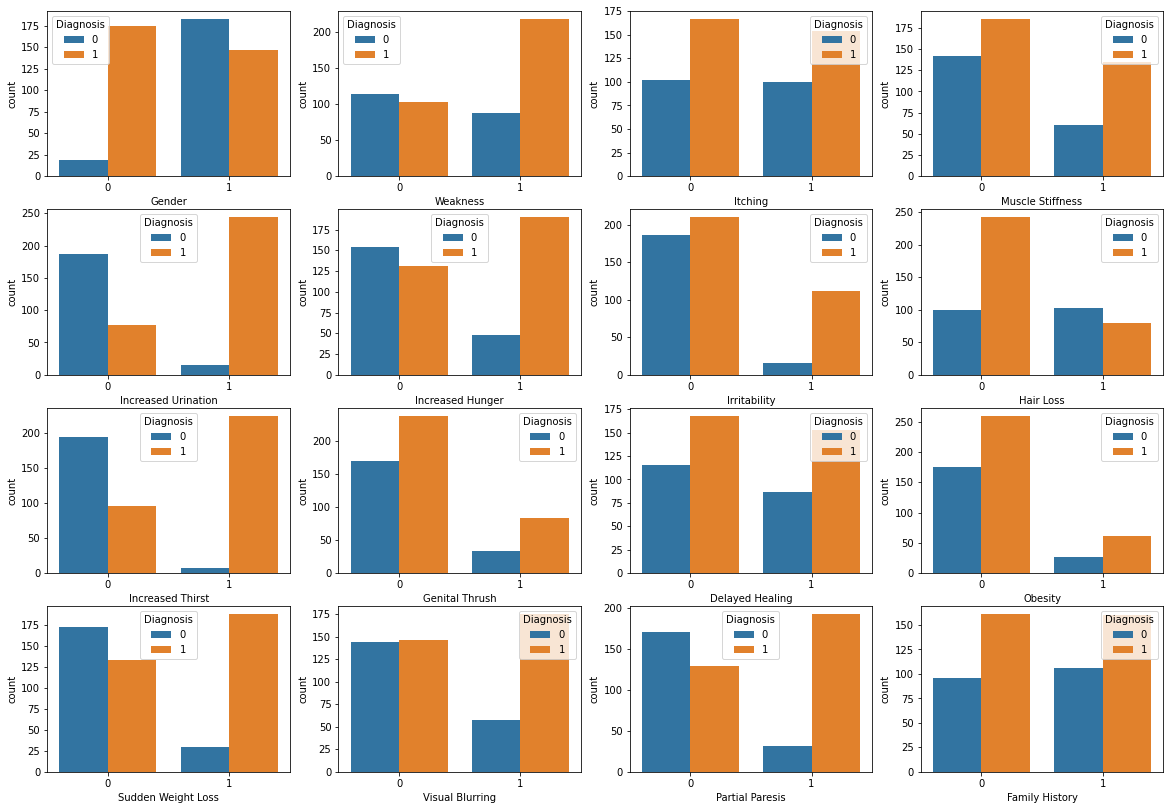

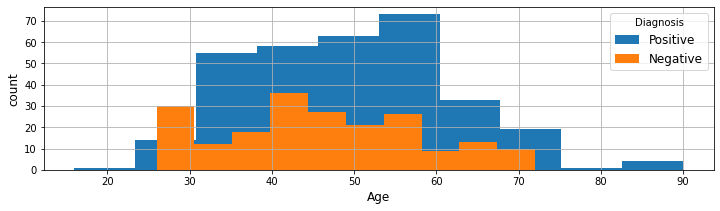

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

percents = pd.DataFrame(np.zeros([17,3]), columns = ['Train %' , 'Test %', 'Delta %'],
                        index=Features, dtype = np.int32)

fig, ax =plt.subplots(4,4, figsize=(20, 14))
fig2, ax2 = plt.subplots(figsize=(12, 3))

for i,feat in enumerate(Features):
    if feat != 'Age':
        sns.countplot(x=feat, hue="Diagnosis", data= data[["Diagnosis", feat]],
                      ax=ax[(i-1)%4][((i-1)//4)])
    if feat == 'Age':
        percents['Train %'][feat] = (np.mean(X_train[feat]))
        percents['Test %'][feat] = (np.mean(X_test[feat]))
        percents['Delta %'][feat] = (np.mean(X_test[feat])) - (np.mean(X_train[feat]))
        percents = percents.rename(index = {feat:"Age (mean)"})
        X[feat][Y.index[(Y == 1)['Diagnosis'] == True].tolist()].hist(
            label = 'Positive', ax = ax2)
        X[feat][Y.index[(Y == 0)['Diagnosis'] == True].tolist()].hist(
            label = 'Negative', ax = ax2)
        ax2.legend(title = 'Diagnosis', fontsize = 'large')
        ax2.set_xlabel(feat, fontsize = 'large')
        ax2.set_ylabel('count', fontsize = 'large')
        #ax.legend(loc='upper right')
    elif feat == 'Gender':
        idx_1 = (X_train == 1).index[(X_train == 1)[feat] == True].tolist()
        percents['Train %'][feat] = (100 * len(idx_1) / len(X_train))
        idx_2 = (X_test == 1).index[(X_test == 1)[feat] == True].tolist()
        percents['Test %'][feat] = (100 * len(idx_2) / len(X_test))
        percents['Delta %'][feat] = (100 * len(idx_2) / len(X_test))-(100 * len(idx_1) / len(X_train))
        percents = percents.rename(index = {feat:"Gender (Male)"})
    elif feat == 'Family History':
        idx_1 = X_train.index[X_train[feat] == True].tolist()
        percents['Train %'][feat] = (100 * len(idx_1) / len(X_train))
        idx_2 = X_test.index[X_test[feat] == True].tolist()
        percents['Test %'][feat] = (100 * len(idx_2) / len(X_test))
        percents['Delta %'][feat] = (100 * len(idx_2) / len(X_test))-(100 * len(idx_1) / len(X_train))
    else:
        idx_1 = (X_train == 1).index[(X_train == 1)[feat] == True].tolist()
        percents['Train %'][feat] = (100 * len(idx_1) / len(X_train))
        idx_2 = (X_test == 1).index[(X_test == 1)[feat] == True].tolist()
        percents['Test %'][feat] = (100 * len(idx_2) / len(X_test))
        percents['Delta %'][feat] = (100 * len(idx_2) / len(X_test))-(100 * len(idx_1) / len(X_train))
    
display(percents)

##### 3) a.
###### i.
**Q:** What issues could an imbalance of features between train and test cause?

**A:** An imbalance in features between train and test may cause over-fitting. because there will be "Too much" influence of one feature at can 
       create a wrong weights prediction and therefore our test results will be poor.

###### ii.
**Q:** How could you solve the issue?

**A:** We can solve this issue by splitting the train and test with the same ratio of features. if we can't do that we can use methods like
        KFold to help us disterbute our train and test better for the trainning.

In [6]:
# a table that shows cross correlation between 2 features with positive diagnosis

cross_features = pd.DataFrame(np.zeros([16,16]), columns = Features[1:],
                              index=Features[1:], dtype = np.int32)
cm = sns.light_palette("green", as_cmap=True)
ixd = {}
for feat in Features[1:]:
    ixd[feat] = (X[feat]==1)[Y.index[(Y == 1)['Diagnosis'] == True].tolist()]

for feat in Features[1:]:
    for feat2 in Features[1:]:
        cross_features[feat][feat2]=sum(1 for i in Y.index[
            (Y == 1)['Diagnosis']==True] if ixd[feat][i] and ixd[feat2][i])

cross_features = cross_features.style.\
    set_caption("Cross-Correlation between features with positive diagnosis").set_table_styles([{
    'selector': 'caption', 'props': [('color', 'green'),('font-size', '16px')]}]).\
    background_gradient(cmap=cm)
display(cross_features)

,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Family History
Gender,147,114,100,74,101,75,66,71,67,63,65,70,55,64,31,74
Increased Urination,114,244,193,161,178,157,63,135,122,86,123,161,105,57,48,120
Increased Thirst,100,193,225,146,175,146,55,140,122,79,121,153,103,41,48,112
Sudden Weight Loss,74,161,146,188,148,127,47,100,95,68,98,124,89,37,42,84
Weakness,101,178,175,148,218,139,50,136,116,80,116,147,106,46,45,108
Increased Hunger,75,157,146,127,139,190,40,107,100,78,109,134,93,43,36,86
Genital Thrush,66,63,55,47,50,40,83,36,51,43,47,28,33,36,20,41
Visual Blurring,71,135,140,100,136,107,36,175,100,57,85,128,87,38,42,89
Itching,67,122,122,95,116,100,51,100,154,65,95,100,72,31,27,74
Irritability,63,86,79,68,80,78,43,57,65,111,63,66,61,41,24,57


##### 3) d.
###### i.
**Q:** Was there anything unexpected?

**A:**

###### ii.
**Q:** Are there any features that you feel will be particularly important to your model? Explain why.

**A:** 

In [7]:
#4)
#encoding our data as one hot vector

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

one_hot_data = data.drop("Age", axis=1) # Age is not binary
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(one_hot_data)

print(one_hot_encoded)
print(one_hot_encoded.shape)

[[0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 0.]]
(523, 34)


#### 5)
**a.i**


In [8]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

def evaluate_metrics(y_test, y_pred_test):
    TN = calc_TN(y_test, y_pred_test)
    FP = calc_FP(y_test, y_pred_test)
    FN = calc_FN(y_test, y_pred_test)
    TP = calc_TP(y_test, y_pred_test)
    PPV = TP / (TP + FP)
    SE = TP / (TP + FN)
    SP = TN/(TN+FP)
    PPV = TP/(TP+FP)
    ACC = (TP+TN)/(TP+TN+FP+FN)
    F1 = (2*SE*PPV)/(SE+PPV)
    return SE, SP, PPV, ACC, F1

def plot_print_model_results(model, x_test, y_test):
    y_pred_test = model.predict(x_test)
    y_proba_test = model.predict_proba(x_test)
    plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)
    plt.grid(False)
    
    [SE, SP, PPV, ACC, F1] = evaluate_metrics(y_test, y_pred_test)
    print('Sensitvity: {:.2f}'.format(SE))
    print('Specifcity: {:.2f}'.format(SP))
    print('Percision: {:.2f}'.format(PPV))
    print('Accuracy: {:.2f}'.format(ACC))
    print('F1: {:.2f}'.format(F1))
    print('AUROC: {:.2f}'.format(roc_auc_score(y_test, y_proba_test[:,1])))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.910, test=0.881), f1=(train=0.924, test=0.896), precision=(train=0.968, test=0.956), recall=(train=0.883, test=0.843), roc_auc=(train=0.973, test=0.983), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.919, test=0.869), f1=(train=0.931, test=0.887), precision=(train=0.973, test=0.956), recall=(train=0.893, test=0.827), roc_auc=(train=0.979, test=0.956), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.922, test=0.881), f1=(train=0.933, test=0.898), precision=(train=0.994, test=0.957), recall=(train=0.878, test=0.846), roc_auc=(train=0.981, test=0.954), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear ...............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

[CV]  svm__C=0.1, svm__kernel=linear, accuracy=(train=0.958, test=0.881), f1=(train=0.965, test=0.902), precision=(train=0.985, test=0.920), recall=(train=0.946, test=0.885), roc_auc=(train=0.980, test=0.941), total=   0.0s
[CV] svm__C=0.1, svm__kernel=linear ..................................
[CV]  svm__C=0.1, svm__kernel=linear, accuracy=(train=0.937, test=0.928), f1=(train=0.948, test=0.938), precision=(train=0.960, test=1.000), recall=(train=0.937, test=0.882), roc_auc=(train=0.977, test=0.979), total=   0.0s
[CV] svm__C=0.1, svm__kernel=linear ..................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=0.1, svm__kernel=linear, accuracy=(train=0.928, test=0.964), f1=(train=0.941, test=0.970), precision=(train=0.950, test=0.980), recall=(train=0.932, test=0.961), roc_auc=(train=0.975, test=0.991), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.934, test=0.893), f1=(train=0.946, test=0.911), precision=(train=0.960, test=0.920), recall=(train=0.932, test=0.902), roc_auc=(train=0.983, test=0.982), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.949, test=0.905), f1=(train=0.959, test=0.922), precision=(train=0.952, test=0.940), recall=(train=0.966, test=0.904), roc_auc=(train=0.985, test=0.956), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.952, test=0.881), f1=(train=0.961, test=0.904), precision=(

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=10.0, svm__kernel=linear, accuracy=(train=0.934, test=0.893), f1=(train=0.946, test=0.913), precision=(train=0.951, test=0.904), recall=(train=0.942, test=0.922), roc_auc=(train=0.984, test=0.976), total=   0.1s
[CV] svm__C=10.0, svm__kernel=linear .................................
[CV]  svm__C=10.0, svm__kernel=linear, accuracy=(train=0.946, test=0.917), f1=(train=0.956, test=0.932), precision=(train=0.952, test=0.941), recall=(train=0.961, test=0.923), roc_auc=(train=0.987, test=0.956), total=   0.1s
[CV] svm__C=10.0, svm__kernel=linear .................................
[CV]  svm__C=10.0, svm__kernel=linear, accuracy=(train=0.961, test=0.893), f1=(train=0.968, test=0.914), precision=(train=0.975, test=0.906), recall=(train=0.961, test=0.923), roc_auc=(train=0.983, test=0.950), total=   0.1s
[CV] svm__C=10.0, svm__kernel=linear .................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=10.0, svm__kernel=linear, accuracy=(train=0.943, test=0.964), f1=(train=0.954, test=0.970), precision=(train=0.961, test=1.000), recall=(train=0.947, test=0.941), roc_auc=(train=0.980, test=0.971), total=   0.1s
[CV] svm__C=10.0, svm__kernel=linear .................................
[CV]  svm__C=10.0, svm__kernel=linear, accuracy=(train=0.943, test=0.940), f1=(train=0.954, test=0.950), precision=(train=0.947, test=0.960), recall=(train=0.961, test=0.941), roc_auc=(train=0.981, test=0.982), total=   0.1s
[CV] svm__C=100.0, svm__kernel=linear ................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=100.0, svm__kernel=linear, accuracy=(train=0.937, test=0.893), f1=(train=0.949, test=0.911), precision=(train=0.956, test=0.920), recall=(train=0.942, test=0.902), roc_auc=(train=0.982, test=0.971), total=   0.4s
[CV] svm__C=100.0, svm__kernel=linear ................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=100.0, svm__kernel=linear, accuracy=(train=0.946, test=0.917), f1=(train=0.956, test=0.932), precision=(train=0.952, test=0.941), recall=(train=0.961, test=0.923), roc_auc=(train=0.987, test=0.956), total=   0.3s
[CV] svm__C=100.0, svm__kernel=linear ................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=100.0, svm__kernel=linear, accuracy=(train=0.961, test=0.893), f1=(train=0.968, test=0.913), precision=(train=0.975, test=0.922), recall=(train=0.961, test=0.904), roc_auc=(train=0.984, test=0.945), total=   0.3s
[CV] svm__C=100.0, svm__kernel=linear ................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=100.0, svm__kernel=linear, accuracy=(train=0.943, test=0.964), f1=(train=0.954, test=0.970), precision=(train=0.961, test=1.000), recall=(train=0.947, test=0.941), roc_auc=(train=0.980, test=0.970), total=   0.8s
[CV] svm__C=100.0, svm__kernel=linear ................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=100.0, svm__kernel=linear, accuracy=(train=0.940, test=0.928), f1=(train=0.952, test=0.941), precision=(train=0.943, test=0.941), recall=(train=0.961, test=0.941), roc_auc=(train=0.981, test=0.981), total=   0.4s
[CV] svm__C=1000.0, svm__kernel=linear ...............................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=linear, accuracy=(train=0.937, test=0.893), f1=(train=0.949, test=0.911), precision=(train=0.956, test=0.920), recall=(train=0.942, test=0.902), roc_auc=(train=0.982, test=0.971), total=   3.8s
[CV] svm__C=1000.0, svm__kernel=linear ...............................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=linear, accuracy=(train=0.946, test=0.917), f1=(train=0.956, test=0.932), precision=(train=0.952, test=0.941), recall=(train=0.961, test=0.923), roc_auc=(train=0.987, test=0.956), total=   3.1s
[CV] svm__C=1000.0, svm__kernel=linear ...............................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=linear, accuracy=(train=0.961, test=0.893), f1=(train=0.968, test=0.913), precision=(train=0.975, test=0.922), recall=(train=0.961, test=0.904), roc_auc=(train=0.984, test=0.945), total=   5.1s
[CV] svm__C=1000.0, svm__kernel=linear ...............................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=linear, accuracy=(train=0.943, test=0.964), f1=(train=0.954, test=0.970), precision=(train=0.961, test=1.000), recall=(train=0.947, test=0.941), roc_auc=(train=0.980, test=0.970), total=   7.0s
[CV] svm__C=1000.0, svm__kernel=linear ...............................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=linear, accuracy=(train=0.940, test=0.928), f1=(train=0.952, test=0.941), precision=(train=0.943, test=0.941), recall=(train=0.961, test=0.941), roc_auc=(train=0.981, test=0.981), total=   6.6s
Linear SVM recieves Best results with: {'svm__C': 0.01, 'svm__kernel': 'linear'}
Sensitvity: 0.80
Specifcity: 0.90
Percision: 0.93
Accuracy: 0.84
F1: 0.86
AUROC: 0.96


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   28.7s finished
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


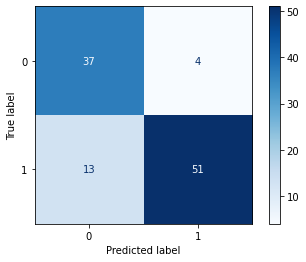

In [9]:
#linear SVC
from sklearn.model_selection import StratifiedKFold as SKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

k_fold_num = 5
skf = SKFold(n_splits=k_fold_num, random_state=10, shuffle=True)
C = np.array([0.01, 0.1, 1, 10, 100, 1000])
#gamma = np.array([0.01, 0.1, 1, 10, 100, 1000])
scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']


svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()),('svm', svc)])
params = {'svm__kernel': ['linear'],
          'svm__C':C#,
          #'svm__gamma': gamma,
         }
linear_svm = GridSearchCV(estimator=pipe,
                          param_grid=params,
                          cv=skf,
                          scoring=scoring,
                          refit='roc_auc',
                          verbose=3,
                          return_train_score=True)

linear_svm.fit(X_train, y_train)
best_linear_svm = linear_svm.best_estimator_
print('Linear SVM recieves Best results with: {}'.format(linear_svm.best_params_))
plot_print_model_results(best_linear_svm, X_test, y_test)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.617, test=0.607), f1=(train=0.763, test=0.756), precision=(train=0.617, test=0.607), recall=(train=1.000, test=1.000), roc_auc=(train=0.978, test=0.967), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.978, test=0.960), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.980, test=0.969), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversio

[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.977, test=0.980), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.977, test=0.983), total=   0.0s
[CV] svm__C=0.01, svm__kernel=poly ...................................
[CV]  svm__C=0.01, svm__kernel=poly, accuracy=(train=0.617, test=0.607), f1=(train=0.763, test=0.756), precision=(train=0.617, test=0.607), recall=(train=1.000, test=1.000), roc_auc=(train=0.994, test=0.976), total=   0.0s
[CV] svm__C=0.01, svm__kernel=poly ...................................
[CV]  svm__C=0.01, svm__kernel=poly, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=0.01, svm__kernel=poly, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.991, test=0.994), total=   0.0s
[CV] svm__C=0.1, svm__kernel=rbf .....................................
[CV]  svm__C=0.1, svm__kernel=rbf, accuracy=(train=0.946, test=0.917), f1=(train=0.957, test=0.932), precision=(train=0.952, test=0.923), recall=(train=0.961, test=0.941), roc_auc=(train=0.985, test=0.980), total=   0.0s
[CV] svm__C=0.1, svm__kernel=rbf .....................................
[CV]  svm__C=0.1, svm__kernel=rbf, accuracy=(train=0.943, test=0.929), f1=(train=0.954, test=0.942), precision=(train=0.939, test=0.942), recall=(train=0.971, test=0.942), roc_auc=(train=0.987, test=0.969), total=   0.0s
[CV] svm__C=0.1, svm__kernel=rbf .....................................
[CV]  svm__C=0.1, svm__kernel=rbf, accuracy=(train=0.943, test=0.940), f1=(train=0.954, test=0.953), precision=(train=0.95

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=0.1, svm__kernel=rbf, accuracy=(train=0.940, test=0.940), f1=(train=0.952, test=0.950), precision=(train=0.935, test=0.960), recall=(train=0.971, test=0.941), roc_auc=(train=0.986, test=0.984), total=   0.0s
[CV] svm__C=0.1, svm__kernel=rbf .....................................
[CV]  svm__C=0.1, svm__kernel=rbf, accuracy=(train=0.931, test=0.952), f1=(train=0.945, test=0.962), precision=(train=0.938, test=0.943), recall=(train=0.951, test=0.980), roc_auc=(train=0.984, test=0.991), total=   0.0s
[CV] svm__C=0.1, svm__kernel=poly ....................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=0.1, svm__kernel=poly, accuracy=(train=0.955, test=0.905), f1=(train=0.964, test=0.923), precision=(train=0.953, test=0.906), recall=(train=0.976, test=0.941), roc_auc=(train=0.994, test=0.982), total=   0.0s
[CV] svm__C=0.1, svm__kernel=poly ....................................
[CV]  svm__C=0.1, svm__kernel=poly, accuracy=(train=0.949, test=0.929), f1=(train=0.959, test=0.943), precision=(train=0.939, test=0.926), recall=(train=0.980, test=0.962), roc_auc=(train=0.994, test=0.981), total=   0.0s
[CV] svm__C=0.1, svm__kernel=poly ....................................
[CV]  svm__C=0.1, svm__kernel=poly, accuracy=(train=0.931, test=0.940), f1=(train=0.945, test=0.953), precision=(train=0.921, test=0.927), recall=(train=0.971, test=0.981), roc_auc=(train=0.993, test=0.986), total=   0.0s
[CV] svm__C=0.1, svm__kernel=poly ....................................
[CV]  svm__C=0.1, svm__kernel=poly, accuracy=(train=0.946, test=0.928), f1=(train=0.957, test=0.942), precision=(train=0.

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=0.1, svm__kernel=poly, accuracy=(train=0.934, test=0.940), f1=(train=0.948, test=0.953), precision=(train=0.926, test=0.911), recall=(train=0.971, test=1.000), roc_auc=(train=0.992, test=0.995), total=   0.0s
[CV] svm__C=1.0, svm__kernel=rbf .....................................
[CV]  svm__C=1.0, svm__kernel=rbf, accuracy=(train=0.982, test=0.964), f1=(train=0.985, test=0.970), precision=(train=0.995, test=0.980), recall=(train=0.976, test=0.961), roc_auc=(train=1.000, test=0.995), total=   0.0s
[CV] svm__C=1.0, svm__kernel=rbf .....................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=1.0, svm__kernel=rbf, accuracy=(train=0.982, test=0.964), f1=(train=0.985, test=0.970), precision=(train=0.995, test=1.000), recall=(train=0.976, test=0.942), roc_auc=(train=0.999, test=0.996), total=   0.0s
[CV] svm__C=1.0, svm__kernel=rbf .....................................
[CV]  svm__C=1.0, svm__kernel=rbf, accuracy=(train=0.988, test=0.940), f1=(train=0.990, test=0.953), precision=(train=0.995, test=0.927), recall=(train=0.985, test=0.981), roc_auc=(train=1.000, test=0.992), total=   0.0s
[CV] svm__C=1.0, svm__kernel=rbf .....................................
[CV]  svm__C=1.0, svm__kernel=rbf, accuracy=(train=0.982, test=0.952), f1=(train=0.985, test=0.959), precision=(train=0.995, test=1.000), recall=(train=0.976, test=0.922), roc_auc=(train=0.999, test=1.000), total=   0.0s
[CV] svm__C=1.0, svm__kernel=rbf .....................................
[CV]  svm__C=1.0, svm__kernel=rbf, accuracy=(train=0.985, test=0.964), f1=(train=0.988, test=0.970), precision=(train=0.990,

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1.0, svm__kernel=poly, accuracy=(train=0.991, test=0.952), f1=(train=0.993, test=0.960), precision=(train=1.000, test=1.000), recall=(train=0.985, test=0.923), roc_auc=(train=1.000, test=0.993), total=   0.0s
[CV] svm__C=1.0, svm__kernel=poly ....................................
[CV]  svm__C=1.0, svm__kernel=poly, accuracy=(train=0.991, test=0.940), f1=(train=0.993, test=0.953), precision=(train=0.995, test=0.927), recall=(train=0.990, test=0.981), roc_auc=(train=1.000, test=0.992), total=   0.0s
[CV] svm__C=1.0, svm__kernel=poly ....................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1.0, svm__kernel=poly, accuracy=(train=0.988, test=0.964), f1=(train=0.990, test=0.970), precision=(train=1.000, test=1.000), recall=(train=0.981, test=0.941), roc_auc=(train=0.999, test=0.999), total=   0.0s
[CV] svm__C=1.0, svm__kernel=poly ....................................
[CV]  svm__C=1.0, svm__kernel=poly, accuracy=(train=0.991, test=0.976), f1=(train=0.993, test=0.980), precision=(train=0.995, test=1.000), recall=(train=0.990, test=0.961), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ....................................
[CV]  svm__C=10.0, svm__kernel=rbf, accuracy=(train=0.997, test=0.952), f1=(train=0.998, test=0.960), precision=(train=1.000, test=0.980), recall=(train=0.995, test=0.941), roc_auc=(train=1.000, test=0.994), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ....................................
[CV]  svm__C=10.0, svm__kernel=rbf, accuracy=(train=0.997, test=0.976), f1=(train=0.998, test=0.980), precision=(train=1.

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=10.0, svm__kernel=rbf, accuracy=(train=0.994, test=0.952), f1=(train=0.995, test=0.963), precision=(train=0.995, test=0.929), recall=(train=0.995, test=1.000), roc_auc=(train=1.000, test=0.998), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ....................................
[CV]  svm__C=10.0, svm__kernel=rbf, accuracy=(train=0.994, test=0.952), f1=(train=0.995, test=0.959), precision=(train=1.000, test=1.000), recall=(train=0.990, test=0.922), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ....................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=10.0, svm__kernel=rbf, accuracy=(train=0.994, test=0.976), f1=(train=0.995, test=0.980), precision=(train=1.000, test=1.000), recall=(train=0.990, test=0.961), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=10.0, svm__kernel=poly ...................................
[CV]  svm__C=10.0, svm__kernel=poly, accuracy=(train=0.997, test=0.940), f1=(train=0.998, test=0.950), precision=(train=1.000, test=0.960), recall=(train=0.995, test=0.941), roc_auc=(train=1.000, test=0.991), total=   0.0s
[CV] svm__C=10.0, svm__kernel=poly ...................................
[CV]  svm__C=10.0, svm__kernel=poly, accuracy=(train=0.997, test=0.964), f1=(train=0.998, test=0.970), precision=(train=1.000, test=1.000), recall=(train=0.995, test=0.942), roc_auc=(train=1.000, test=0.996), total=   0.0s
[CV] svm__C=10.0, svm__kernel=poly ...................................
[CV]  svm__C=10.0, svm__kernel=poly, accuracy=(train=0.997, test=0.964), f1=(train=0.998, test=0.972), precision=(train

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=100.0, svm__kernel=rbf, accuracy=(train=0.997, test=0.976), f1=(train=0.998, test=0.980), precision=(train=1.000, test=1.000), recall=(train=0.995, test=0.962), roc_auc=(train=1.000, test=0.996), total=   0.0s
[CV] svm__C=100.0, svm__kernel=rbf ...................................
[CV]  svm__C=100.0, svm__kernel=rbf, accuracy=(train=0.994, test=0.976), f1=(train=0.995, test=0.981), precision=(train=1.000, test=0.981), recall=(train=0.990, test=0.981), roc_auc=(train=1.000, test=0.996), total=   0.0s
[CV] svm__C=100.0, svm__kernel=rbf ...................................
[CV]  svm__C=100.0, svm__kernel=rbf, accuracy=(train=0.994, test=0.964), f1=(train=0.995, test=0.970), precision=(train=1.000, test=1.000), recall=(train=0.990, test=0.941), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=100.0, svm__kernel=rbf ...................................
[CV]  svm__C=100.0, svm__kernel=rbf, accuracy=(train=0.994, test=1.000), f1=(train=0.995, test=1.000), precision=(trai

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=100.0, svm__kernel=poly, accuracy=(train=0.997, test=0.952), f1=(train=0.998, test=0.961), precision=(train=1.000, test=0.980), recall=(train=0.995, test=0.942), roc_auc=(train=1.000, test=0.996), total=   0.0s
[CV] svm__C=100.0, svm__kernel=poly ..................................
[CV]  svm__C=100.0, svm__kernel=poly, accuracy=(train=0.994, test=0.976), f1=(train=0.995, test=0.981), precision=(train=1.000, test=0.981), recall=(train=0.990, test=0.981), roc_auc=(train=1.000, test=0.998), total=   0.0s
[CV] svm__C=100.0, svm__kernel=poly ..................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=100.0, svm__kernel=poly, accuracy=(train=0.994, test=0.964), f1=(train=0.995, test=0.970), precision=(train=1.000, test=0.980), recall=(train=0.990, test=0.961), roc_auc=(train=1.000, test=0.999), total=   0.0s
[CV] svm__C=100.0, svm__kernel=poly ..................................
[CV]  svm__C=100.0, svm__kernel=poly, accuracy=(train=0.994, test=0.988), f1=(train=0.995, test=0.990), precision=(train=1.000, test=1.000), recall=(train=0.990, test=0.980), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=1000.0, svm__kernel=rbf ..................................
[CV]  svm__C=1000.0, svm__kernel=rbf, accuracy=(train=1.000, test=0.881), f1=(train=1.000, test=0.900), precision=(train=1.000, test=0.918), recall=(train=1.000, test=0.882), roc_auc=(train=1.000, test=0.942), total=   0.0s
[CV] svm__C=1000.0, svm__kernel=rbf ..................................
[CV]  svm__C=1000.0, svm__kernel=rbf, accuracy=(train=0.997, test=0.964), f1=(train=0.998, test=0.971), precision=(

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=rbf, accuracy=(train=0.997, test=0.893), f1=(train=0.998, test=0.909), precision=(train=1.000, test=0.957), recall=(train=0.995, test=0.865), roc_auc=(train=1.000, test=0.972), total=   0.0s
[CV] svm__C=1000.0, svm__kernel=rbf ..................................
[CV]  svm__C=1000.0, svm__kernel=rbf, accuracy=(train=1.000, test=0.916), f1=(train=1.000, test=0.932), precision=(train=1.000, test=0.923), recall=(train=1.000, test=0.941), roc_auc=(train=1.000, test=0.945), total=   0.0s
[CV] svm__C=1000.0, svm__kernel=rbf ..................................
[CV]  svm__C=1000.0, svm__kernel=rbf, accuracy=(train=0.997, test=0.976), f1=(train=0.998, test=0.981), precision=(train=1.000, test=0.962), recall=(train=0.995, test=1.000), roc_auc=(train=1.000, test=1.000), total=   0.0s
[CV] svm__C=1000.0, svm__kernel=poly .................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=1000.0, svm__kernel=poly, accuracy=(train=1.000, test=0.893), f1=(train=1.000, test=0.911), precision=(train=1.000, test=0.920), recall=(train=1.000, test=0.902), roc_auc=(train=1.000, test=0.925), total=   0.0s
[CV] svm__C=1000.0, svm__kernel=poly .................................
[CV]  svm__C=1000.0, svm__kernel=poly, accuracy=(train=0.997, test=0.940), f1=(train=0.998, test=0.950), precision=(train=1.000, test=0.980), recall=(train=0.995, test=0.923), roc_auc=(train=1.000, test=0.995), total=   0.0s
[CV] svm__C=1000.0, svm__kernel=poly .................................
[CV]  svm__C=1000.0, svm__kernel=poly, accuracy=(train=1.000, test=0.917), f1=(train=1.000, test=0.933), precision=(train=1.000, test=0.925), recall=(train=1.000, test=0.942), roc_auc=(train=1.000, test=0.974), total=   0.0s
[CV] svm__C=1000.0, svm__kernel=poly .................................
[CV]  svm__C=1000.0, svm__kernel=poly, accuracy=(train=1.000, test=0.916), f1=(train=1.000, test=0.932), precisi

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


non-linear SVM recieves Best results with: {'svm__C': 10.0, 'svm__kernel': 'rbf'}
Sensitvity: 0.86
Specifcity: 1.00
Percision: 1.00
Accuracy: 0.91
F1: 0.92
AUROC: 0.99


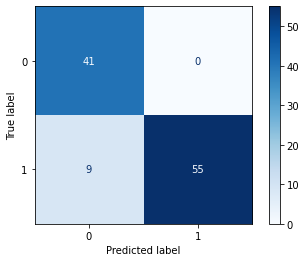

In [10]:
#non-linear classifier
params = {'svm__kernel': ['rbf', 'poly'],
          'svm__C':C#,
          #'svm__gamma': gamma,
         }
non_linear_svm = GridSearchCV(estimator=pipe,
                          param_grid=params,
                          cv=skf,
                          scoring=scoring,
                          refit='roc_auc',
                          verbose=3,
                          return_train_score=True)

non_linear_svm.fit(X_train, y_train)
best_non_linear_svm = non_linear_svm.best_estimator_
print('non-linear SVM recieves Best results with: {}'.format(non_linear_svm.best_params_))
plot_print_model_results(non_linear_svm, X_test, y_test)


### 5.c)
we can see that non-linear has better results than linear

### 6 Feature Selection

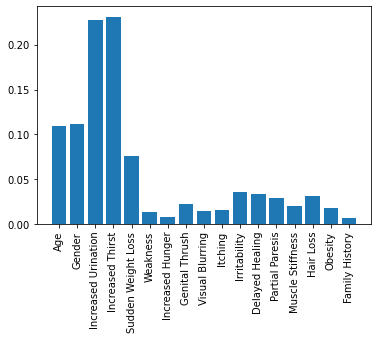

In [11]:
from sklearn.ensemble import RandomForestClassifier 
random_forest = RandomForestClassifier(n_estimators=10,
                                       max_depth=None, random_state=0,
                                       criterion='gini', max_features='auto')
rfc = random_forest.fit(X_train, np.ravel(y_train))
features_importance = rfc.feature_importances_

plt.bar(Features, features_importance)
plt.xticks(rotation=90)
plt.show()
    

6.a.i) We can see that Increased Thirst and Increased Urination are the most important feature according to random forest.

6.a.ii) 

## 7) Data Separability Visualization

#### 7.a)

In [12]:
def plt_2d_pca(X_pca,y):
    if isinstance(y, pd.DataFrame):
        y = np.concatenate(y.values.tolist())
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

98.24% of data information was conserved.
[[-0.28993168 -1.07775051]
 [ 0.45052529 -1.07201148]
 [-1.11246205 -0.80374149]
 [-0.44949894  1.72471382]
 [ 0.45178149 -1.39061122]
 [-0.12500047 -1.55006906]
 [-0.28760463 -0.34244185]
 [ 0.86407842 -0.60483243]
 [ 0.53384267  0.93108121]
 [-1.11251096 -0.84986962]]


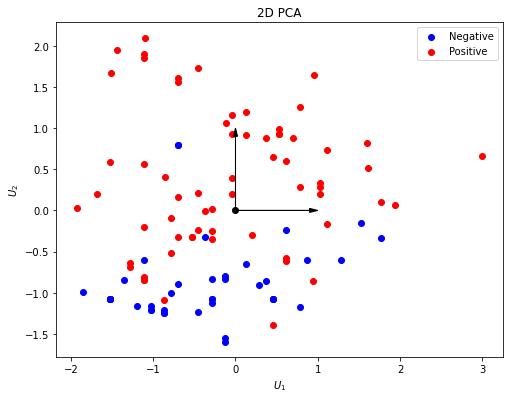

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
scaler = StandardScaler()
x_train_reduced = pca.fit_transform(X_train)
x_train_reduced = scaler.fit_transform(x_train_reduced)
x_test_reduced = pca.transform(X_test)
x_test_reduced = scaler.transform(x_test_reduced)
#plot figure as requested
print('{:.2f}% of data information was conserved.'.format(100*np.sum(pca.explained_variance_ratio_)))
plt_2d_pca(x_test_reduced,y_test)

#### 7.b)

### 7.c)

#### linear-svm after dimensionality reduced

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.841, test=0.857), f1=(train=0.866, test=0.880), precision=(train=0.901, test=0.898), recall=(train=0.835, test=0.863), roc_auc=(train=0.928, test=0.920), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.832, test=0.869), f1=(train=0.857, test=0.893), precision=(train=0.898, test=0.902), recall=(train=0.820, test=0.885), roc_auc=(train=0.925, test=0.927), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.859, test=0.798), f1=(train=0.880, test=0.828), precision=(train=0.920, test=0.872), recall=(train=0.844, test=0.788), roc_auc=(train=0.933, test=0.897), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear ...............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.853, test=0.845), f1=(train=0.879, test=0.874), precision=(train=0.894, test=0.865), recall=(train=0.864, test=0.882), roc_auc=(train=0.933, test=0.945), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.844, test=0.857), f1=(train=0.871, test=0.887), precision=(train=0.884, test=0.870), recall=(train=0.859, test=0.904), roc_auc=(train=0.933, test=0.948), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.865, test=0.810), f1=(train=0.889, test=0.840), precision=(train=0.900, test=0.875), recall=(train=0.878, test=0.808), roc_auc=(train=0.940, test=0.900), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.839, test=0.904), f1=(train=0.868, test=0.920), precision=(

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=100.0, svm__kernel=linear, accuracy=(train=0.853, test=0.845), f1=(train=0.879, test=0.874), precision=(train=0.894, test=0.865), recall=(train=0.864, test=0.882), roc_auc=(train=0.933, test=0.945), total=   0.0s
[CV] svm__C=100.0, svm__kernel=linear ................................
[CV]  svm__C=100.0, svm__kernel=linear, accuracy=(train=0.847, test=0.869), f1=(train=0.873, test=0.895), precision=(train=0.889, test=0.887), recall=(train=0.859, test=0.904), roc_auc=(train=0.933, test=0.948), total=   0.1s
[CV] svm__C=100.0, svm__kernel=linear ................................
[CV]  svm__C=100.0, svm__kernel=linear, accuracy=(train=0.865, test=0.810), f1=(train=0.889, test=0.840), precision=(train=0.900, test=0.875), recall=(train=0.878, test=0.808), roc_auc=(train=0.940, test=0.902), total=   0.0s
[CV] svm__C=100.0, svm__kernel=linear ................................
[CV]  svm__C=100.0, svm__kernel=linear, accuracy=(train=0.839, test=0.904), f1=(train=0.868, test=0.920), pre

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=1000.0, svm__kernel=linear, accuracy=(train=0.853, test=0.845), f1=(train=0.879, test=0.874), precision=(train=0.894, test=0.865), recall=(train=0.864, test=0.882), roc_auc=(train=0.933, test=0.945), total=   0.3s
[CV] svm__C=1000.0, svm__kernel=linear ...............................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=linear, accuracy=(train=0.847, test=0.869), f1=(train=0.873, test=0.895), precision=(train=0.889, test=0.887), recall=(train=0.859, test=0.904), roc_auc=(train=0.933, test=0.948), total=   0.2s
[CV] svm__C=1000.0, svm__kernel=linear ...............................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=linear, accuracy=(train=0.865, test=0.810), f1=(train=0.889, test=0.840), precision=(train=0.900, test=0.875), recall=(train=0.878, test=0.808), roc_auc=(train=0.940, test=0.902), total=   0.2s
[CV] svm__C=1000.0, svm__kernel=linear ...............................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=linear, accuracy=(train=0.839, test=0.904), f1=(train=0.868, test=0.920), precision=(train=0.876, test=0.939), recall=(train=0.859, test=0.902), roc_auc=(train=0.927, test=0.961), total=   0.3s
[CV] svm__C=1000.0, svm__kernel=linear ...............................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=linear, accuracy=(train=0.857, test=0.843), f1=(train=0.882, test=0.869), precision=(train=0.895, test=0.896), recall=(train=0.869, test=0.843), roc_auc=(train=0.938, test=0.907), total=   0.3s
Linear SVM recieves Best results with: {'svm__C': 0.1, 'svm__kernel': 'linear'}
Sensitvity: 0.83
Specifcity: 0.85
Percision: 0.90
Accuracy: 0.84
F1: 0.86
AUROC: 0.91


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.9s finished
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


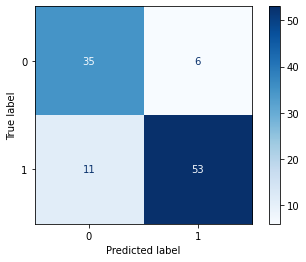

In [14]:
linear_svm.fit(x_train_reduced, y_train)
best_linear_svm = linear_svm.best_estimator_
print('Linear SVM recieves Best results with: {}'.format(linear_svm.best_params_))
plot_print_model_results(best_linear_svm, x_test_reduced, y_test)

#### non-linear SVM after dimentionality reduction

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.617, test=0.607), f1=(train=0.763, test=0.756), precision=(train=0.617, test=0.607), recall=(train=1.000, test=1.000), roc_auc=(train=0.934, test=0.909), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.930, test=0.939), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.940, test=0.890), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.919, test=0.956), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.615, test=0.614), f1=(train=0.762, test=0.761), precision=(train=0.615, test=0.614), recall=(train=1.000, test=1.000), roc_auc=(train=0.933, test=0.941), total=   0.0s
[CV] svm__C=0.01, svm__kernel=poly ...................................
[CV]  svm__C=0.01, svm__kernel=poly, accuracy=(train=0.728, test=0.679), f1=(train=0.816, test=0.784), precision=(train=0

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=0.01, svm__kernel=poly, accuracy=(train=0.716, test=0.750), f1=(train=0.809, test=0.824), precision=(train=0.688, test=0.731), recall=(train=0.980, test=0.942), roc_auc=(train=0.918, test=0.877), total=   0.0s
[CV] svm__C=0.01, svm__kernel=poly ...................................
[CV]  svm__C=0.01, svm__kernel=poly, accuracy=(train=0.722, test=0.711), f1=(train=0.811, test=0.806), precision=(train=0.698, test=0.685), recall=(train=0.966, test=0.980), roc_auc=(train=0.916, test=0.928), total=   0.0s
[CV] svm__C=0.01, svm__kernel=poly ...................................
[CV]  svm__C=0.01, svm__kernel=poly, accuracy=(train=0.719, test=0.747), f1=(train=0.810, test=0.826), precision=(train=0.694, test=0.714), recall=(train=0.971, test=0.980), roc_auc=(train=0.911, test=0.911), total=   0.0s
[CV] svm__C=0.1, svm__kernel=rbf .....................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=0.1, svm__kernel=rbf, accuracy=(train=0.859, test=0.833), f1=(train=0.884, test=0.865), precision=(train=0.899, test=0.849), recall=(train=0.869, test=0.882), roc_auc=(train=0.941, test=0.925), total=   0.0s
[CV] svm__C=0.1, svm__kernel=rbf .....................................
[CV]  svm__C=0.1, svm__kernel=rbf, accuracy=(train=0.847, test=0.869), f1=(train=0.873, test=0.895), precision=(train=0.889, test=0.887), recall=(train=0.859, test=0.904), roc_auc=(train=0.939, test=0.947), total=   0.0s
[CV] svm__C=0.1, svm__kernel=rbf .....................................
[CV]  svm__C=0.1, svm__kernel=rbf, accuracy=(train=0.862, test=0.810), f1=(train=0.886, test=0.843), precision=(train=0.899, test=0.860), recall=(train=0.873, test=0.827), roc_auc=(train=0.947, test=0.900), total=   0.0s
[CV] svm__C=0.1, svm__kernel=rbf .....................................
[CV]  svm__C=0.1, svm__kernel=rbf, accuracy=(train=0.842, test=0.892), f1=(train=0.870, test=0.909), precision=(train=0.881,

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=0.1, svm__kernel=poly, accuracy=(train=0.811, test=0.798), f1=(train=0.859, test=0.855), precision=(train=0.793, test=0.769), recall=(train=0.937, test=0.962), roc_auc=(train=0.915, test=0.923), total=   0.0s
[CV] svm__C=0.1, svm__kernel=poly ....................................
[CV]  svm__C=0.1, svm__kernel=poly, accuracy=(train=0.805, test=0.810), f1=(train=0.854, test=0.855), precision=(train=0.792, test=0.810), recall=(train=0.927, test=0.904), roc_auc=(train=0.931, test=0.902), total=   0.0s
[CV] svm__C=0.1, svm__kernel=poly ....................................
[CV]  svm__C=0.1, svm__kernel=poly, accuracy=(train=0.806, test=0.843), f1=(train=0.855, test=0.879), precision=(train=0.790, test=0.839), recall=(train=0.932, test=0.922), roc_auc=(train=0.925, test=0.936), total=   0.0s
[CV] svm__C=0.1, svm__kernel=poly ....................................
[CV]  svm__C=0.1, svm__kernel=poly, accuracy=(train=0.809, test=0.807), f1=(train=0.857, test=0.857), precision=(train=0.

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=1.0, svm__kernel=rbf, accuracy=(train=0.886, test=0.821), f1=(train=0.905, test=0.848), precision=(train=0.933, test=0.875), recall=(train=0.879, test=0.824), roc_auc=(train=0.943, test=0.935), total=   0.0s
[CV] svm__C=1.0, svm__kernel=rbf .....................................
[CV]  svm__C=1.0, svm__kernel=rbf, accuracy=(train=0.871, test=0.905), f1=(train=0.893, test=0.922), precision=(train=0.913, test=0.940), recall=(train=0.873, test=0.904), roc_auc=(train=0.942, test=0.947), total=   0.0s
[CV] svm__C=1.0, svm__kernel=rbf .....................................
[CV]  svm__C=1.0, svm__kernel=rbf, accuracy=(train=0.883, test=0.857), f1=(train=0.902, test=0.880), precision=(train=0.928, test=0.917), recall=(train=0.878, test=0.846), roc_auc=(train=0.943, test=0.883), total=   0.0s
[CV] svm__C=1.0, svm__kernel=rbf .....................................
[CV]  svm__C=1.0, svm__kernel=rbf, accuracy=(train=0.872, test=0.916), f1=(train=0.893, test=0.929), precision=(train=0.914,

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=1.0, svm__kernel=poly, accuracy=(train=0.808, test=0.821), f1=(train=0.857, test=0.865), precision=(train=0.793, test=0.814), recall=(train=0.932, test=0.923), roc_auc=(train=0.938, test=0.909), total=   0.0s
[CV] svm__C=1.0, svm__kernel=poly ....................................
[CV]  svm__C=1.0, svm__kernel=poly, accuracy=(train=0.806, test=0.843), f1=(train=0.856, test=0.879), precision=(train=0.788, test=0.839), recall=(train=0.937, test=0.922), roc_auc=(train=0.928, test=0.944), total=   0.0s
[CV] svm__C=1.0, svm__kernel=poly ....................................
[CV]  svm__C=1.0, svm__kernel=poly, accuracy=(train=0.809, test=0.783), f1=(train=0.857, test=0.839), precision=(train=0.796, test=0.770), recall=(train=0.927, test=0.922), roc_auc=(train=0.926, test=0.909), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ....................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=10.0, svm__kernel=rbf, accuracy=(train=0.883, test=0.845), f1=(train=0.902, test=0.869), precision=(train=0.937, test=0.896), recall=(train=0.869, test=0.843), roc_auc=(train=0.962, test=0.928), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ....................................
[CV]  svm__C=10.0, svm__kernel=rbf, accuracy=(train=0.883, test=0.881), f1=(train=0.900, test=0.900), precision=(train=0.951, test=0.938), recall=(train=0.854, test=0.865), roc_auc=(train=0.957, test=0.953), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ....................................
[CV]  svm__C=10.0, svm__kernel=rbf, accuracy=(train=0.889, test=0.869), f1=(train=0.906, test=0.887), precision=(train=0.947, test=0.956), recall=(train=0.868, test=0.827), roc_auc=(train=0.961, test=0.907), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ....................................
[CV]  svm__C=10.0, svm__kernel=rbf, accuracy=(train=0.866, test=0.916), f1=(train=0.886, test=0.929), precision=(train=0.

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=10.0, svm__kernel=poly, accuracy=(train=0.826, test=0.786), f1=(train=0.871, test=0.847), precision=(train=0.802, test=0.758), recall=(train=0.951, test=0.962), roc_auc=(train=0.931, test=0.939), total=   0.1s
[CV] svm__C=10.0, svm__kernel=poly ...................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=10.0, svm__kernel=poly, accuracy=(train=0.805, test=0.833), f1=(train=0.854, test=0.873), precision=(train=0.792, test=0.828), recall=(train=0.927, test=0.923), roc_auc=(train=0.940, test=0.915), total=   0.0s
[CV] svm__C=10.0, svm__kernel=poly ...................................
[CV]  svm__C=10.0, svm__kernel=poly, accuracy=(train=0.806, test=0.843), f1=(train=0.856, test=0.879), precision=(train=0.788, test=0.839), recall=(train=0.937, test=0.922), roc_auc=(train=0.930, test=0.950), total=   0.0s
[CV] svm__C=10.0, svm__kernel=poly ...................................
[CV]  svm__C=10.0, svm__kernel=poly, accuracy=(train=0.821, test=0.795), f1=(train=0.865, test=0.847), precision=(train=0.804, test=0.783), recall=(train=0.937, test=0.922), roc_auc=(train=0.925, test=0.907), total=   0.0s
[CV] svm__C=100.0, svm__kernel=rbf ...................................
[CV]  svm__C=100.0, svm__kernel=rbf, accuracy=(train=0.910, test=0.810), f1=(train=0.924, test=0.840), precision=(trai

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=100.0, svm__kernel=poly, accuracy=(train=0.829, test=0.750), f1=(train=0.874, test=0.814), precision=(train=0.802, test=0.742), recall=(train=0.961, test=0.902), roc_auc=(train=0.938, test=0.919), total=   0.3s
[CV] svm__C=100.0, svm__kernel=poly ..................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=100.0, svm__kernel=poly, accuracy=(train=0.826, test=0.798), f1=(train=0.870, test=0.855), precision=(train=0.805, test=0.769), recall=(train=0.946, test=0.962), roc_auc=(train=0.927, test=0.929), total=   0.4s
[CV] svm__C=100.0, svm__kernel=poly ..................................
[CV]  svm__C=100.0, svm__kernel=poly, accuracy=(train=0.805, test=0.833), f1=(train=0.853, test=0.873), precision=(train=0.794, test=0.828), recall=(train=0.922, test=0.923), roc_auc=(train=0.940, test=0.915), total=   0.1s
[CV] svm__C=100.0, svm__kernel=poly ..................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=100.0, svm__kernel=poly, accuracy=(train=0.806, test=0.843), f1=(train=0.856, test=0.879), precision=(train=0.788, test=0.839), recall=(train=0.937, test=0.922), roc_auc=(train=0.930, test=0.950), total=   0.1s
[CV] svm__C=100.0, svm__kernel=poly ..................................
[CV]  svm__C=100.0, svm__kernel=poly, accuracy=(train=0.821, test=0.819), f1=(train=0.863, test=0.862), precision=(train=0.815, test=0.810), recall=(train=0.917, test=0.922), roc_auc=(train=0.923, test=0.900), total=   0.2s
[CV] svm__C=1000.0, svm__kernel=rbf ..................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=rbf, accuracy=(train=0.922, test=0.810), f1=(train=0.934, test=0.840), precision=(train=0.974, test=0.857), recall=(train=0.898, test=0.824), roc_auc=(train=0.975, test=0.881), total=   0.1s
[CV] svm__C=1000.0, svm__kernel=rbf ..................................
[CV]  svm__C=1000.0, svm__kernel=rbf, accuracy=(train=0.910, test=0.881), f1=(train=0.923, test=0.898), precision=(train=0.968, test=0.957), recall=(train=0.883, test=0.846), roc_auc=(train=0.963, test=0.966), total=   0.1s
[CV] svm__C=1000.0, svm__kernel=rbf ..................................
[CV]  svm__C=1000.0, svm__kernel=rbf, accuracy=(train=0.901, test=0.845), f1=(train=0.916, test=0.863), precision=(train=0.953, test=0.953), recall=(train=0.883, test=0.788), roc_auc=(train=0.969, test=0.903), total=   0.1s
[CV] svm__C=1000.0, svm__kernel=rbf ..................................
[CV]  svm__C=1000.0, svm__kernel=rbf, accuracy=(train=0.878, test=0.916), f1=(train=0.897, test=0.933), precision=(

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=1000.0, svm__kernel=rbf, accuracy=(train=0.893, test=0.855), f1=(train=0.910, test=0.875), precision=(train=0.943, test=0.933), recall=(train=0.879, test=0.824), roc_auc=(train=0.966, test=0.933), total=   0.1s
[CV] svm__C=1000.0, svm__kernel=poly .................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=poly, accuracy=(train=0.829, test=0.750), f1=(train=0.874, test=0.814), precision=(train=0.802, test=0.742), recall=(train=0.961, test=0.902), roc_auc=(train=0.938, test=0.919), total=   1.9s
[CV] svm__C=1000.0, svm__kernel=poly .................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=poly, accuracy=(train=0.826, test=0.798), f1=(train=0.870, test=0.855), precision=(train=0.805, test=0.769), recall=(train=0.946, test=0.962), roc_auc=(train=0.930, test=0.938), total=   3.4s
[CV] svm__C=1000.0, svm__kernel=poly .................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=poly, accuracy=(train=0.805, test=0.833), f1=(train=0.853, test=0.873), precision=(train=0.794, test=0.828), recall=(train=0.922, test=0.923), roc_auc=(train=0.940, test=0.915), total=   1.2s
[CV] svm__C=1000.0, svm__kernel=poly .................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=poly, accuracy=(train=0.806, test=0.843), f1=(train=0.856, test=0.879), precision=(train=0.788, test=0.839), recall=(train=0.937, test=0.922), roc_auc=(train=0.930, test=0.950), total=   0.9s
[CV] svm__C=1000.0, svm__kernel=poly .................................


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=poly, accuracy=(train=0.824, test=0.831), f1=(train=0.865, test=0.870), precision=(train=0.818, test=0.825), recall=(train=0.917, test=0.922), roc_auc=(train=0.923, test=0.898), total=   1.0s
non-linear SVM recieves Best results with: {'svm__C': 10.0, 'svm__kernel': 'rbf'}
Sensitvity: 0.81
Specifcity: 0.93
Percision: 0.95
Accuracy: 0.86
F1: 0.87
AUROC: 0.93


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   10.8s finished
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


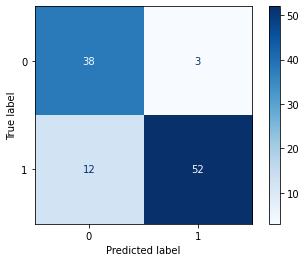

In [15]:
non_linear_svm.fit(x_train_reduced, y_train)
best_non_linear_svm = non_linear_svm.best_estimator_
print('non-linear SVM recieves Best results with: {}'.format(non_linear_svm.best_params_))
plot_print_model_results(best_non_linear_svm, x_test_reduced, y_test)

#### 7.d) Training on best 2 features

In [16]:
x_train_best_features = X_train.iloc[:, [2,3]]
x_test_best_features = X_test.iloc[:, [2,3]]

##### linear-svm on 2 best features

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.832, test=0.833), f1=(train=0.851, test=0.848), precision=(train=0.941, test=0.951), recall=(train=0.777, test=0.765), roc_auc=(train=0.917, test=0.920), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.838, test=0.810), f1=(train=0.856, test=0.830), precision=(train=0.947, test=0.929), recall=(train=0.780, test=0.750), roc_auc=(train=0.922, test=0.898), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.841, test=0.798), f1=(train=0.859, test=0.817), precision=(train=0.947, test=0.927), recall=(train=0.785, test=0.731), roc_auc=(train=0.922, test=0.898), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.827, test=0.855), f1=(train=0.845, test=0.872), precision=(train=0.940, test=0.953), recall=(train=0.767, test=0.804), roc_auc=(train=0.913, test=0.935), total=   0.0s
[CV] svm__C=0.01, svm__kernel=linear .................................
[CV]  svm__C=0.01, svm__kernel=linear, accuracy=(train=0.824, test=0.867), f1=(train=0.842, test=0.884), precision=(train=0.940, test=0.955), recall=(train=0.762, test=0.824), roc_auc=(train=0.913, test=0.934), total=   0.0s
[CV] svm__C=0.1, svm__kernel=linear ..................................
[CV]  svm__C=0.1, svm__kernel=linear, accuracy=(train=0.883, test=0.881), f1=(train=0.903, test=0.900), precisio

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=0.1, svm__kernel=linear, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.913, test=0.935), total=   0.0s
[CV] svm__C=0.1, svm__kernel=linear ..................................
[CV]  svm__C=0.1, svm__kernel=linear, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.913, test=0.934), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.883, test=0.881), f1=(train=0.903, test=0.900), precision=(train=0.928, test=0.918), recall=(train=0.879, test=0.882), roc_auc=(train=0.919, test=0.922), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.889, test=0.857), f1=(train=0.908, test=0.880), precision=(

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.886, test=0.869), f1=(train=0.905, test=0.891), precision=(train=0.928, test=0.918), recall=(train=0.883, test=0.865), roc_auc=(train=0.922, test=0.898), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.915, test=0.938), total=   0.0s
[CV] svm__C=1.0, svm__kernel=linear ..................................
[CV]  svm__C=1.0, svm__kernel=linear, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.916, test=0.933), total=   0.0s
[CV] svm__C=10.0, svm__kernel=linear .................................
[CV]  svm__C=10.0, svm__kernel=linear, accuracy=(train=0.883, test=0.881), f1=(train=0.903, test=0.900), precision=

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=10.0, svm__kernel=linear, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.915, test=0.938), total=   0.0s
[CV] svm__C=10.0, svm__kernel=linear .................................
[CV]  svm__C=10.0, svm__kernel=linear, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.916, test=0.933), total=   0.0s
[CV] svm__C=100.0, svm__kernel=linear ................................
[CV]  svm__C=100.0, svm__kernel=linear, accuracy=(train=0.883, test=0.881), f1=(train=0.903, test=0.900), precision=(train=0.928, test=0.918), recall=(train=0.879, test=0.882), roc_auc=(train=0.919, test=0.922), total=   0.0s
[CV] svm__C=100.0, svm__kernel=linear ................................
[CV]  svm__C=100.0, svm__kernel=linear, accuracy=(train=0.889, test=0.857), f1=(train=0.908, test=0.880), preci

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=100.0, svm__kernel=linear, accuracy=(train=0.886, test=0.869), f1=(train=0.905, test=0.891), precision=(train=0.928, test=0.918), recall=(train=0.883, test=0.865), roc_auc=(train=0.922, test=0.898), total=   0.0s
[CV] svm__C=100.0, svm__kernel=linear ................................
[CV]  svm__C=100.0, svm__kernel=linear, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.915, test=0.938), total=   0.0s
[CV] svm__C=100.0, svm__kernel=linear ................................
[CV]  svm__C=100.0, svm__kernel=linear, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.916, test=0.933), total=   0.0s
[CV] svm__C=1000.0, svm__kernel=linear ...............................
[CV]  svm__C=1000.0, svm__kernel=linear, accuracy=(train=0.883, test=0.881), f1=(train=0.903, test=0.900), pr

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  svm__C=1000.0, svm__kernel=linear, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.915, test=0.938), total=   0.0s
[CV] svm__C=1000.0, svm__kernel=linear ...............................
[CV]  svm__C=1000.0, svm__kernel=linear, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.916, test=0.933), total=   0.0s
Linear SVM recieves Best results with: {'svm__C': 1.0, 'svm__kernel': 'linear'}
Sensitvity: 0.78
Specifcity: 0.88
Percision: 0.91
Accuracy: 0.82
F1: 0.84


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.6s finished
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AUROC: 0.86


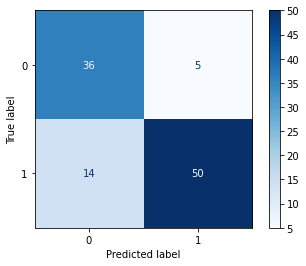

In [17]:
linear_svm.fit(x_train_best_features, y_train)
best_linear_svm = linear_svm.best_estimator_
print('Linear SVM recieves Best results with: {}'.format(linear_svm.best_params_))
plot_print_model_results(best_linear_svm, x_test_best_features, y_test)

##### non-linear-svm on 2 best features

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.883, test=0.881), f1=(train=0.903, test=0.900), precision=(train=0.928, test=0.918), recall=(train=0.879, test=0.882), roc_auc=(train=0.917, test=0.920), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.889, test=0.857), f1=(train=0.908, test=0.880), precision=(train=0.929, test=0.917), recall=(train=0.888, test=0.846), roc_auc=(train=0.922, test=0.898), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.886, test=0.869), f1=(train=0.905, test=0.891), precision=(train=0.928, test=0.918), recall=(train=0.883, test=0.865), roc_auc=(train=0.922, test=0.898), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.913, test=0.935), total=   0.0s
[CV] svm__C=0.01, svm__kernel=rbf ....................................
[CV]  svm__C=0.01, svm__kernel=rbf, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.913, test=0.934), total=   0.0s
[CV] svm__C=0.01, svm__kernel=poly ...................................
[CV]  svm__C=0.01, svm__kernel=poly, accuracy=(train=0.760, test=0.798), f1=(train=0.759, test=0.800), precision=(train=1

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=0.1, svm__kernel=rbf, accuracy=(train=0.883, test=0.881), f1=(train=0.903, test=0.900), precision=(train=0.928, test=0.918), recall=(train=0.879, test=0.882), roc_auc=(train=0.917, test=0.920), total=   0.0s
[CV] svm__C=0.1, svm__kernel=rbf .....................................
[CV]  svm__C=0.1, svm__kernel=rbf, accuracy=(train=0.889, test=0.857), f1=(train=0.908, test=0.880), precision=(train=0.929, test=0.917), recall=(train=0.888, test=0.846), roc_auc=(train=0.922, test=0.898), total=   0.0s
[CV] svm__C=0.1, svm__kernel=rbf .....................................
[CV]  svm__C=0.1, svm__kernel=rbf, accuracy=(train=0.886, test=0.869), f1=(train=0.905, test=0.891), precision=(train=0.928, test=0.918), recall=(train=0.883, test=0.865), roc_auc=(train=0.876, test=0.853), total=   0.0s
[CV] svm__C=0.1, svm__kernel=rbf .....................................
[CV]  svm__C=0.1, svm__kernel=rbf, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923,

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=0.1, svm__kernel=poly, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.916, test=0.933), total=   0.0s
[CV] svm__C=1.0, svm__kernel=rbf .....................................
[CV]  svm__C=1.0, svm__kernel=rbf, accuracy=(train=0.883, test=0.881), f1=(train=0.903, test=0.900), precision=(train=0.928, test=0.918), recall=(train=0.879, test=0.882), roc_auc=(train=0.919, test=0.922), total=   0.0s
[CV] svm__C=1.0, svm__kernel=rbf .....................................
[CV]  svm__C=1.0, svm__kernel=rbf, accuracy=(train=0.889, test=0.857), f1=(train=0.908, test=0.880), precision=(train=0.929, test=0.917), recall=(train=0.888, test=0.846), roc_auc=(train=0.857, test=0.823), total=   0.0s
[CV] svm__C=1.0, svm__kernel=rbf .....................................
[CV]  svm__C=1.0, svm__kernel=rbf, accuracy=(train=0.886, test=0.869), f1=(train=0.905, test=0.891), precision=(train=0.928

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=1.0, svm__kernel=poly, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.916, test=0.933), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ....................................
[CV]  svm__C=10.0, svm__kernel=rbf, accuracy=(train=0.883, test=0.881), f1=(train=0.903, test=0.900), precision=(train=0.928, test=0.918), recall=(train=0.879, test=0.882), roc_auc=(train=0.917, test=0.920), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ....................................
[CV]  svm__C=10.0, svm__kernel=rbf, accuracy=(train=0.889, test=0.857), f1=(train=0.908, test=0.880), precision=(train=0.929, test=0.917), recall=(train=0.888, test=0.846), roc_auc=(train=0.856, test=0.817), total=   0.0s
[CV] svm__C=10.0, svm__kernel=rbf ....................................
[CV]  svm__C=10.0, svm__kernel=rbf, accuracy=(train=0.886, test=0.869), f1=(train=0.905, test=0.891), precision=(train=0.

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=10.0, svm__kernel=poly, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.913, test=0.934), total=   0.0s
[CV] svm__C=100.0, svm__kernel=rbf ...................................
[CV]  svm__C=100.0, svm__kernel=rbf, accuracy=(train=0.883, test=0.881), f1=(train=0.903, test=0.900), precision=(train=0.928, test=0.918), recall=(train=0.879, test=0.882), roc_auc=(train=0.850, test=0.840), total=   0.0s
[CV] svm__C=100.0, svm__kernel=rbf ...................................
[CV]  svm__C=100.0, svm__kernel=rbf, accuracy=(train=0.889, test=0.857), f1=(train=0.908, test=0.880), precision=(train=0.929, test=0.917), recall=(train=0.888, test=0.846), roc_auc=(train=0.856, test=0.817), total=   0.0s
[CV] svm__C=100.0, svm__kernel=rbf ...................................
[CV]  svm__C=100.0, svm__kernel=rbf, accuracy=(train=0.886, test=0.869), f1=(train=0.905, test=0.891), precision=(trai

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=100.0, svm__kernel=poly, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.913, test=0.934), total=   0.0s
[CV] svm__C=1000.0, svm__kernel=rbf ..................................
[CV]  svm__C=1000.0, svm__kernel=rbf, accuracy=(train=0.883, test=0.881), f1=(train=0.903, test=0.900), precision=(train=0.928, test=0.918), recall=(train=0.879, test=0.882), roc_auc=(train=0.850, test=0.840), total=   0.0s
[CV] svm__C=1000.0, svm__kernel=rbf ..................................
[CV]  svm__C=1000.0, svm__kernel=rbf, accuracy=(train=0.889, test=0.857), f1=(train=0.908, test=0.880), precision=(train=0.929, test=0.917), recall=(train=0.888, test=0.846), roc_auc=(train=0.924, test=0.904), total=   0.0s
[CV] svm__C=1000.0, svm__kernel=rbf ..................................
[CV]  svm__C=1000.0, svm__kernel=rbf, accuracy=(train=0.886, test=0.869), f1=(train=0.905, test=0.891), precision=(

C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

[CV]  svm__C=1000.0, svm__kernel=poly, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.913, test=0.935), total=   0.0s
[CV] svm__C=1000.0, svm__kernel=poly .................................
[CV]  svm__C=1000.0, svm__kernel=poly, accuracy=(train=0.878, test=0.904), f1=(train=0.898, test=0.920), precision=(train=0.923, test=0.939), recall=(train=0.874, test=0.902), roc_auc=(train=0.913, test=0.934), total=   0.0s
non-linear SVM recieves Best results with: {'svm__C': 1.0, 'svm__kernel': 'poly'}
Sensitvity: 0.78
Specifcity: 0.88
Percision: 0.91
Accuracy: 0.82
F1: 0.84
AUROC: 0.86


C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\Dormi\anaconda3\envs\bm-336546-hw2\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


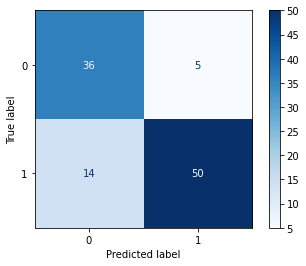

In [18]:
non_linear_svm.fit(x_train_best_features, y_train)
best_non_linear_svm = non_linear_svm.best_estimator_
print('non-linear SVM recieves Best results with: {}'.format(non_linear_svm.best_params_))
plot_print_model_results(best_non_linear_svm, x_test_best_features, y_test)

#### 7.e)
We can see that dimeension reduction preformed better in contrast to 2 feature reduction.
We conclude that with the results from AUROC and F1.
Which clearly show that 2 features alone did less good classification.